<a href="https://colab.research.google.com/github/Sumathi2007/Sumathi2007/blob/main/mall_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Mall_Customers.csv to Mall_Customers.csv
Dataset Loaded Successfully!
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


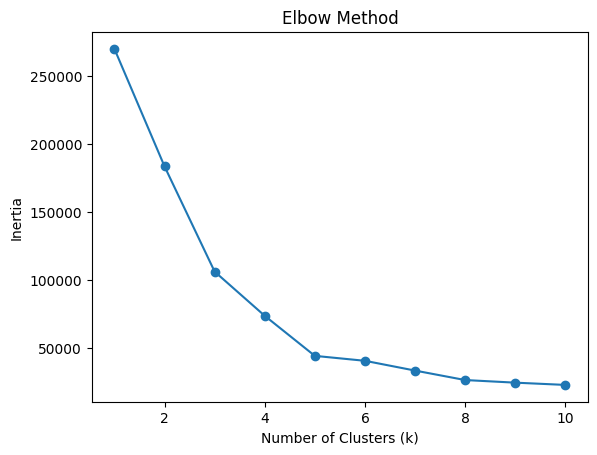

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


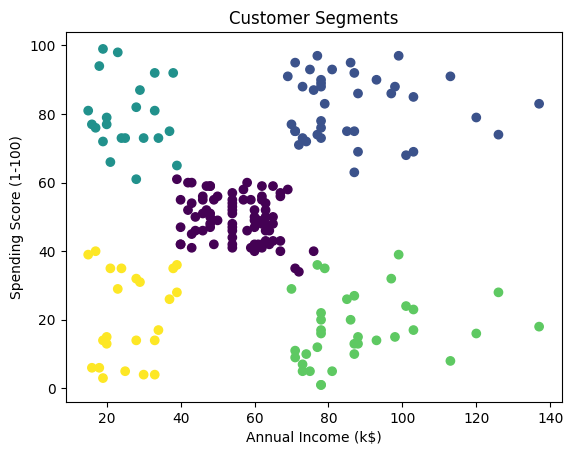

In [2]:
# -------------------------------------
# 1. Upload Dataset
# -------------------------------------
from google.colab import files
uploaded = files.upload()

# -------------------------------------
# 2. Load Dataset
# -------------------------------------
import pandas as pd
df = pd.read_csv(list(uploaded.keys())[0])
print("Dataset Loaded Successfully!")
print(df.head())

# -------------------------------------
# 3. Import Libraries
# -------------------------------------
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# -------------------------------------
# 4. Select Features
# -------------------------------------
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# -------------------------------------
# 5. Elbow Method
# -------------------------------------
inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# -------------------------------------
# 6. Apply K-Means (k=5 example)
# -------------------------------------
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
print(df.head())

# -------------------------------------
# 7. Visualize Clusters
# -------------------------------------
plt.scatter(X['Annual Income (k$)'],
            X['Spending Score (1-100)'],
            c=df['Cluster'])

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.show()
